# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
import re

def clean_euros(x):
    if "M" in x: return int(re.sub("M",'000000', x).replace('.','').replace('€',''))
    if "K" in x: return int(re.sub('K','000', x).replace('.','').replace('€',''))

In [5]:
import re

fifa['ValueNumeric'] = fifa['Value'].apply(clean_euros).astype(float)

In [6]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,1.105000e+09
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,7.700000e+07
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,1.185000e+09
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,7.200000e+07
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,1.020000e+08


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

fifa  = fifa.rename(columns = {"Preferred Foot":"Preferred_Foot"})

model = ols("ValueNumeric ~ C(Position) + C(Preferred_Foot)", data = fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Position),6.026512e+17,26.0,14.651306,5.618828e-64
C(Preferred_Foot),4.472198e+15,1.0,2.826863,9.271675e-02
Residual,2.828522e+19,17879.0,NaN,NaN


What is your conclusion from this ANOVA?

In [8]:
## No existe correlacion entre el pie preferido y el valor del jugador

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [19]:
model = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/home/jelv/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 163, but rank is 162
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(Nationality),1.267984e+18,163.0,5.007149,1.784838e-84
Residual,2.764141e+19,17792.0,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [20]:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred_Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric      252
dtype: int64

In [21]:
fifa = fifa.dropna(); fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred_Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [25]:
X = sm.add_constant(fifa[['Stamina', 'SprintSpeed', ]].apply(lambda x: x.fillna(x.mean())))
Y = fifa['ValueNumeric']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     307.9
Date:                Sun, 05 Jan 2020   Prob (F-statistic):          3.26e-132
Time:                        20:06:00   Log-Likelihood:            -3.3863e+05
No. Observations:               17907   AIC:                         6.773e+05
Df Residuals:                   17904   BIC:                         6.773e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.891e+07   1.42e+06    -13.340      0.000   -2.17e+07   -1.61e+07
Stamina      3.574e+05   2.37e+04     15.110      0.000    3.11e+05    4.04e+05
SprintSpeed  1.571e+05   2.56e+04      6.124      0.000    1.07e+05    2.07e+05
==============================================================================
Omnibus:                    27616.007   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19316590.210
Skew:                           9.670   Prob(JB):                         0.00
Kurtosis:                     162.735   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [12]:
# Your conclusions here:



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [26]:
Y = fifa['ValueNumeric']
X = sm.add_constant(fifa['Potential'])

model = sm.OLS(Y, X).fit() # ordinary least squares
predictions = model.predict(X)

model.summary()


/home/jelv/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4820.
Date:                Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:06:56   Log-Likelihood:            -3.3680e+05
No. Observations:               17907   AIC:                         6.736e+05
Df Residuals:                   17905   BIC:                         6.736e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.012e+08   3.11e+06    -64.716      0.000   -2.07e+08   -1.95e+08
Potential   3.014e+06   4.34e+04     69.429      0.000    2.93e+06     3.1e+06
==============================================================================
Omnibus:                    27943.857   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24441801.784
Skew:                           9.807   Prob(JB):                         0.00
Kurtosis:                     182.927   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [14]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

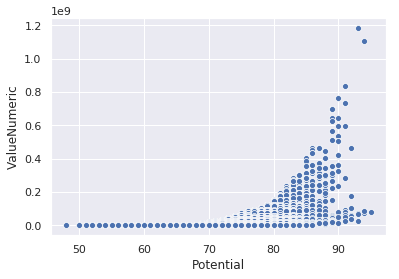

In [31]:
import seaborn as sns; sns.set(); sns.scatterplot(fifa['Potential'], fifa['ValueNumeric']);

In [ ]:
#No se ve una clara relacion lineal entre el potencial y el valor en el mercado de jugador
#pareciera una relacion exponencial entre el potencial y el valor de jugador